In [44]:
%pip install pandas numpy seaborn matplotlib missingno

In [45]:
%pip install scikit-learn imblearn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter

In [50]:
data=pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [51]:
# Mendefinisikan df sebagai variabel untuk menyimpan data csv
df = pd.read_csv("heart_2020_cleaned.csv", encoding='latin1')

# Memanggil 25 data dari keseluruhan data
df.head(25)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [52]:
df.replace({"HeartDisease":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Smoking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"AlcoholDrinking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Stroke":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"DiffWalking":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"Sex":{'Male':0, 'Female':1}}, inplace=True)
df.replace({"Diabetic":{'No':0, 'Yes':1, 'No, borderline diabetes':2, 'Yes (during pregnancy)':3 }}, inplace=True)
df.replace({"PhysicalActivity":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"GenHealth":{'Excellent':1, 'Very good':2, 'Good':3, 'Fair':4, 'Poor':5}}, inplace=True)
df.replace({"Asthma":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"KidneyDisease":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"SkinCancer":{'No':0, 'Yes':1}}, inplace=True)
df.replace({"AgeCategory":{'18-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7,'55-59':8, '60-64':9,'65-69':10, '70-74':11,'75-79':12, '80 or older':13}}, inplace=True)

df.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,8,White,1,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,13,White,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,10,White,1,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,12,White,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,5,White,0,1,2,8,0,0,0
5,1,28.87,1,0,0,6,0,1,1,12,Black,0,0,4,12,0,0,0
6,0,21.63,0,0,0,15,0,0,1,11,White,0,1,4,4,1,0,1
7,0,31.64,1,0,0,5,0,1,1,13,White,1,0,3,9,1,0,0
8,0,26.45,0,0,0,0,0,0,1,13,White,2,0,4,5,0,1,0
9,0,40.69,0,0,0,0,0,1,0,10,White,0,1,3,10,0,0,0


In [53]:
print ("Data Shape: ", df.shape)

Data Shape:  (319795, 18)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [55]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.524727,7.514536,0.194002,0.775362,2.404972,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,0.496776,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,8.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,10.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,13.000000,3.000000,1.000000,5.000000,24.000000,1.000000,1.000000,1.000000


In [56]:
df.HeartDisease.value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

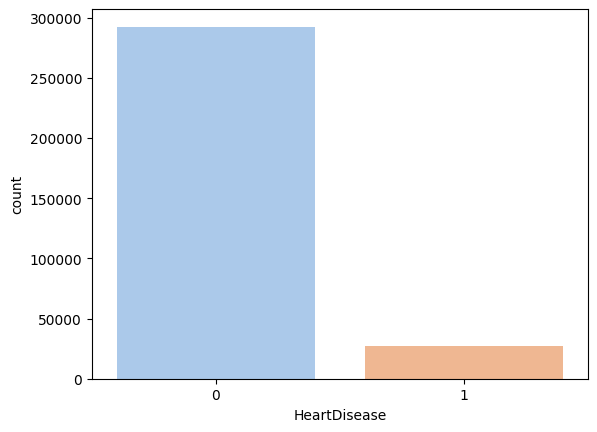

In [57]:
sns.countplot(x='HeartDisease',data=df, palette='pastel')

##Cleaning Data

In [58]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [59]:
df.duplicated().sum()

18078

In [60]:
df = df.drop_duplicates()

In [61]:
df.duplicated().sum()

0

In [62]:
# Temukan baris duplikat
duplikat = df[df.duplicated()]

# Tampilkan variabel mana yang memiliki data duplikat dan datanya
if len(duplikat) > 0:
  print("Variabel dengan data duplikat:")
  for kolom in duplikat.columns:
    print(f"- {kolom}")
  print("\nData duplikat:")
  print(duplikat)
else:
  print("Tidak ada data duplikat dalam variabel.")

Tidak ada data duplikat dalam variabel.


In [63]:
df.drop('Race', axis=1, inplace=True)
#df = df.drop(['Race'], axis=1)


In [64]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,8,1,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,13,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,10,1,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,12,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,5,0,1,2,8,0,0,0


## Exploratory Data Analysis (EDA)

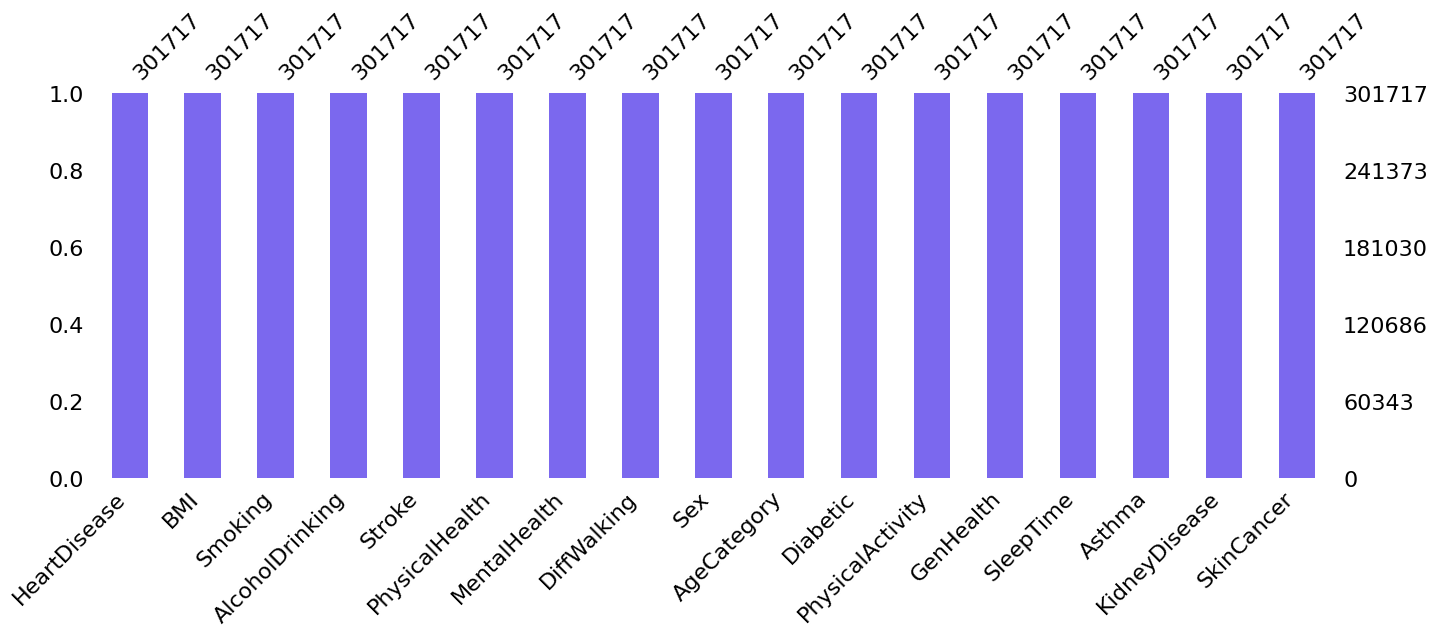

In [65]:
msno.bar(df, figsize = (16,5),color = "#7B68EE")
plt.show()

In [66]:
#melihat korelasi antar variabel data
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.047260,0.104524,-0.036289,0.194665,0.165235,0.020913,0.196420,-0.074435,0.239259,0.119695,-0.093597,0.237920,0.010834,0.035784,0.142672,0.090644
BMI,0.047260,1.000000,0.015890,-0.043463,0.016314,0.103813,0.056724,0.177388,-0.024200,-0.006069,0.165152,-0.144441,0.221339,-0.048653,0.087563,0.047796,-0.038060
Smoking,0.104524,0.015890,1.000000,0.109183,0.058868,0.110270,0.078364,0.115789,-0.087514,0.128259,0.033872,-0.089864,0.164441,-0.027874,0.017545,0.031890,0.030438
AlcoholDrinking,-0.036289,-0.043463,0.109183,1.000000,-0.022707,-0.023255,0.045421,-0.041135,-0.006824,-0.060761,-0.051565,0.024408,-0.039991,-0.003172,-0.007114,-0.031166,-0.008739
Stroke,0.194665,0.016314,0.058868,-0.022707,1.000000,0.132966,0.041324,0.170664,0.001343,0.141537,0.073034,-0.074898,0.164449,0.013697,0.034942,0.089109,0.046039
PhysicalHealth,0.165235,0.103813,0.110270,-0.023255,0.132966,1.000000,0.279657,0.422935,0.038427,0.114623,0.110271,-0.224121,0.480076,-0.058406,0.110083,0.138219,0.036753
MentalHealth,0.020913,0.056724,0.078364,0.045421,0.041324,0.279657,1.000000,0.142964,0.098916,-0.158608,0.023699,-0.084274,0.230043,-0.117078,0.105266,0.032105,-0.040214
DiffWalking,0.196420,0.177388,0.115789,-0.041135,0.170664,0.422935,0.142964,1.000000,0.067335,0.250407,0.153223,-0.271748,0.409798,-0.019155,0.095826,0.149471,0.060596
Sex,-0.074435,-0.024200,-0.087514,-0.006824,0.001343,0.038427,0.098916,0.067335,1.000000,0.060620,0.032500,-0.045309,0.022366,0.014901,0.067960,0.007579,-0.015846
AgeCategory,0.239259,-0.006069,0.128259,-0.060761,0.141537,0.114623,-0.158608,0.250407,0.060620,1.000000,0.155818,-0.125294,0.192321,0.105025,-0.058823,0.126541,0.267930


**Koefisien korelasi adalah ukuran statistik yang menunjukkan kekuatan dan arah hubungan linier antara dua variabel. Kisarannya dari -1 hingga 1:**


*   -1: Korelasi negatif sempurna (jika satu variabel meningkat, variabel lainnya menurun secara proporsional)
*   0: Tidak ada korelasi linier
*   1: Korelasi positif sempurna (jika satu variabel meningkat, variabel lainnya meningkat secara proporsional)

<Axes: >

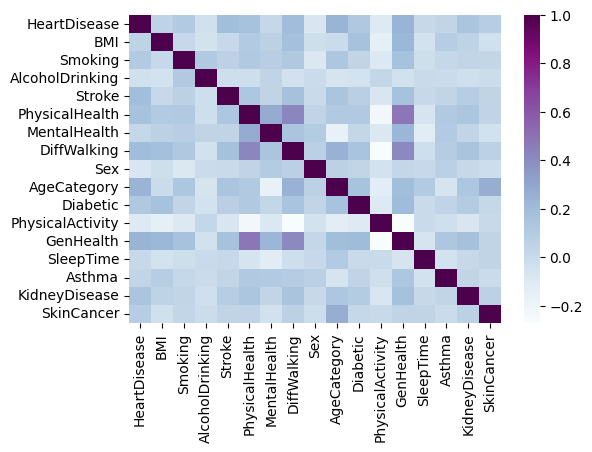

In [67]:
#melihat korelasi data dalam bentuk warna, semakin gelap warna semakin kuat korelasi atau berpengaruh terhadap variabel
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), cmap = 'BuPu')

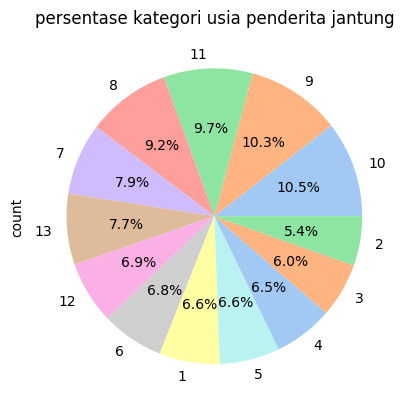

In [68]:
sns.set_palette('pastel')
df['AgeCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('persentase kategori usia penderita jantung')
plt.show()

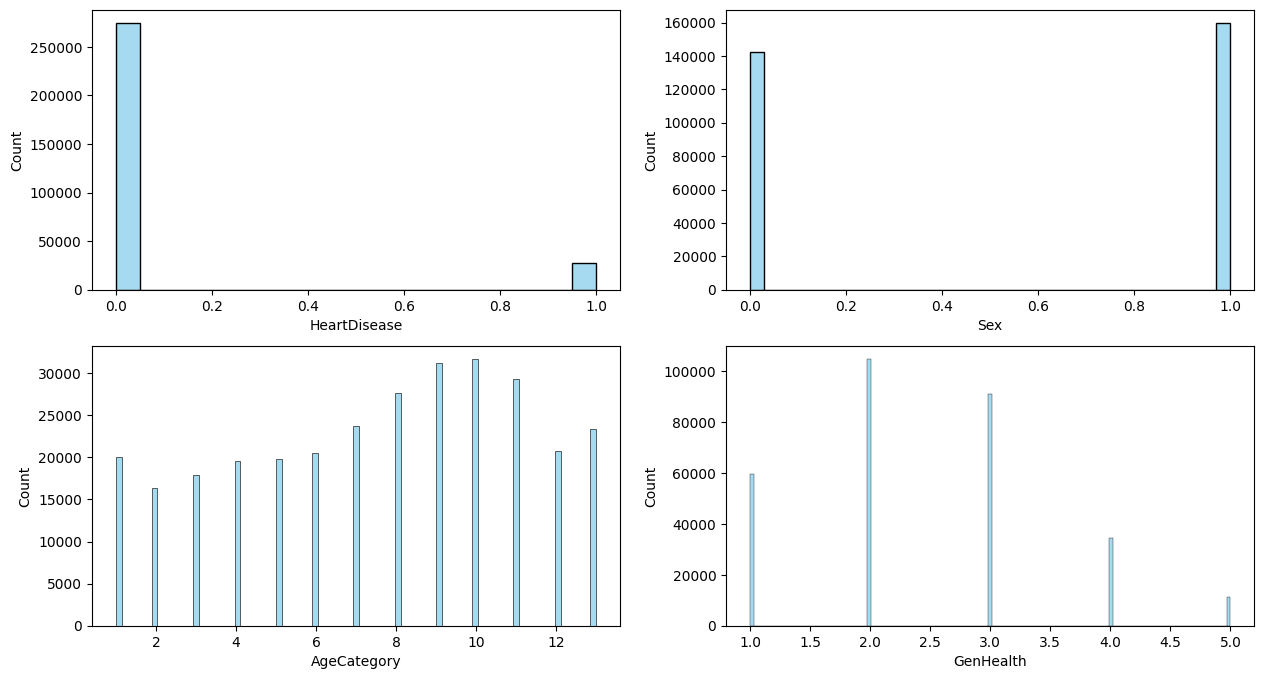

In [69]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='HeartDisease', ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='Sex', ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='AgeCategory', ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='GenHealth', ax=axes[1,1],color='skyblue')


plt.show()

In [70]:
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [71]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

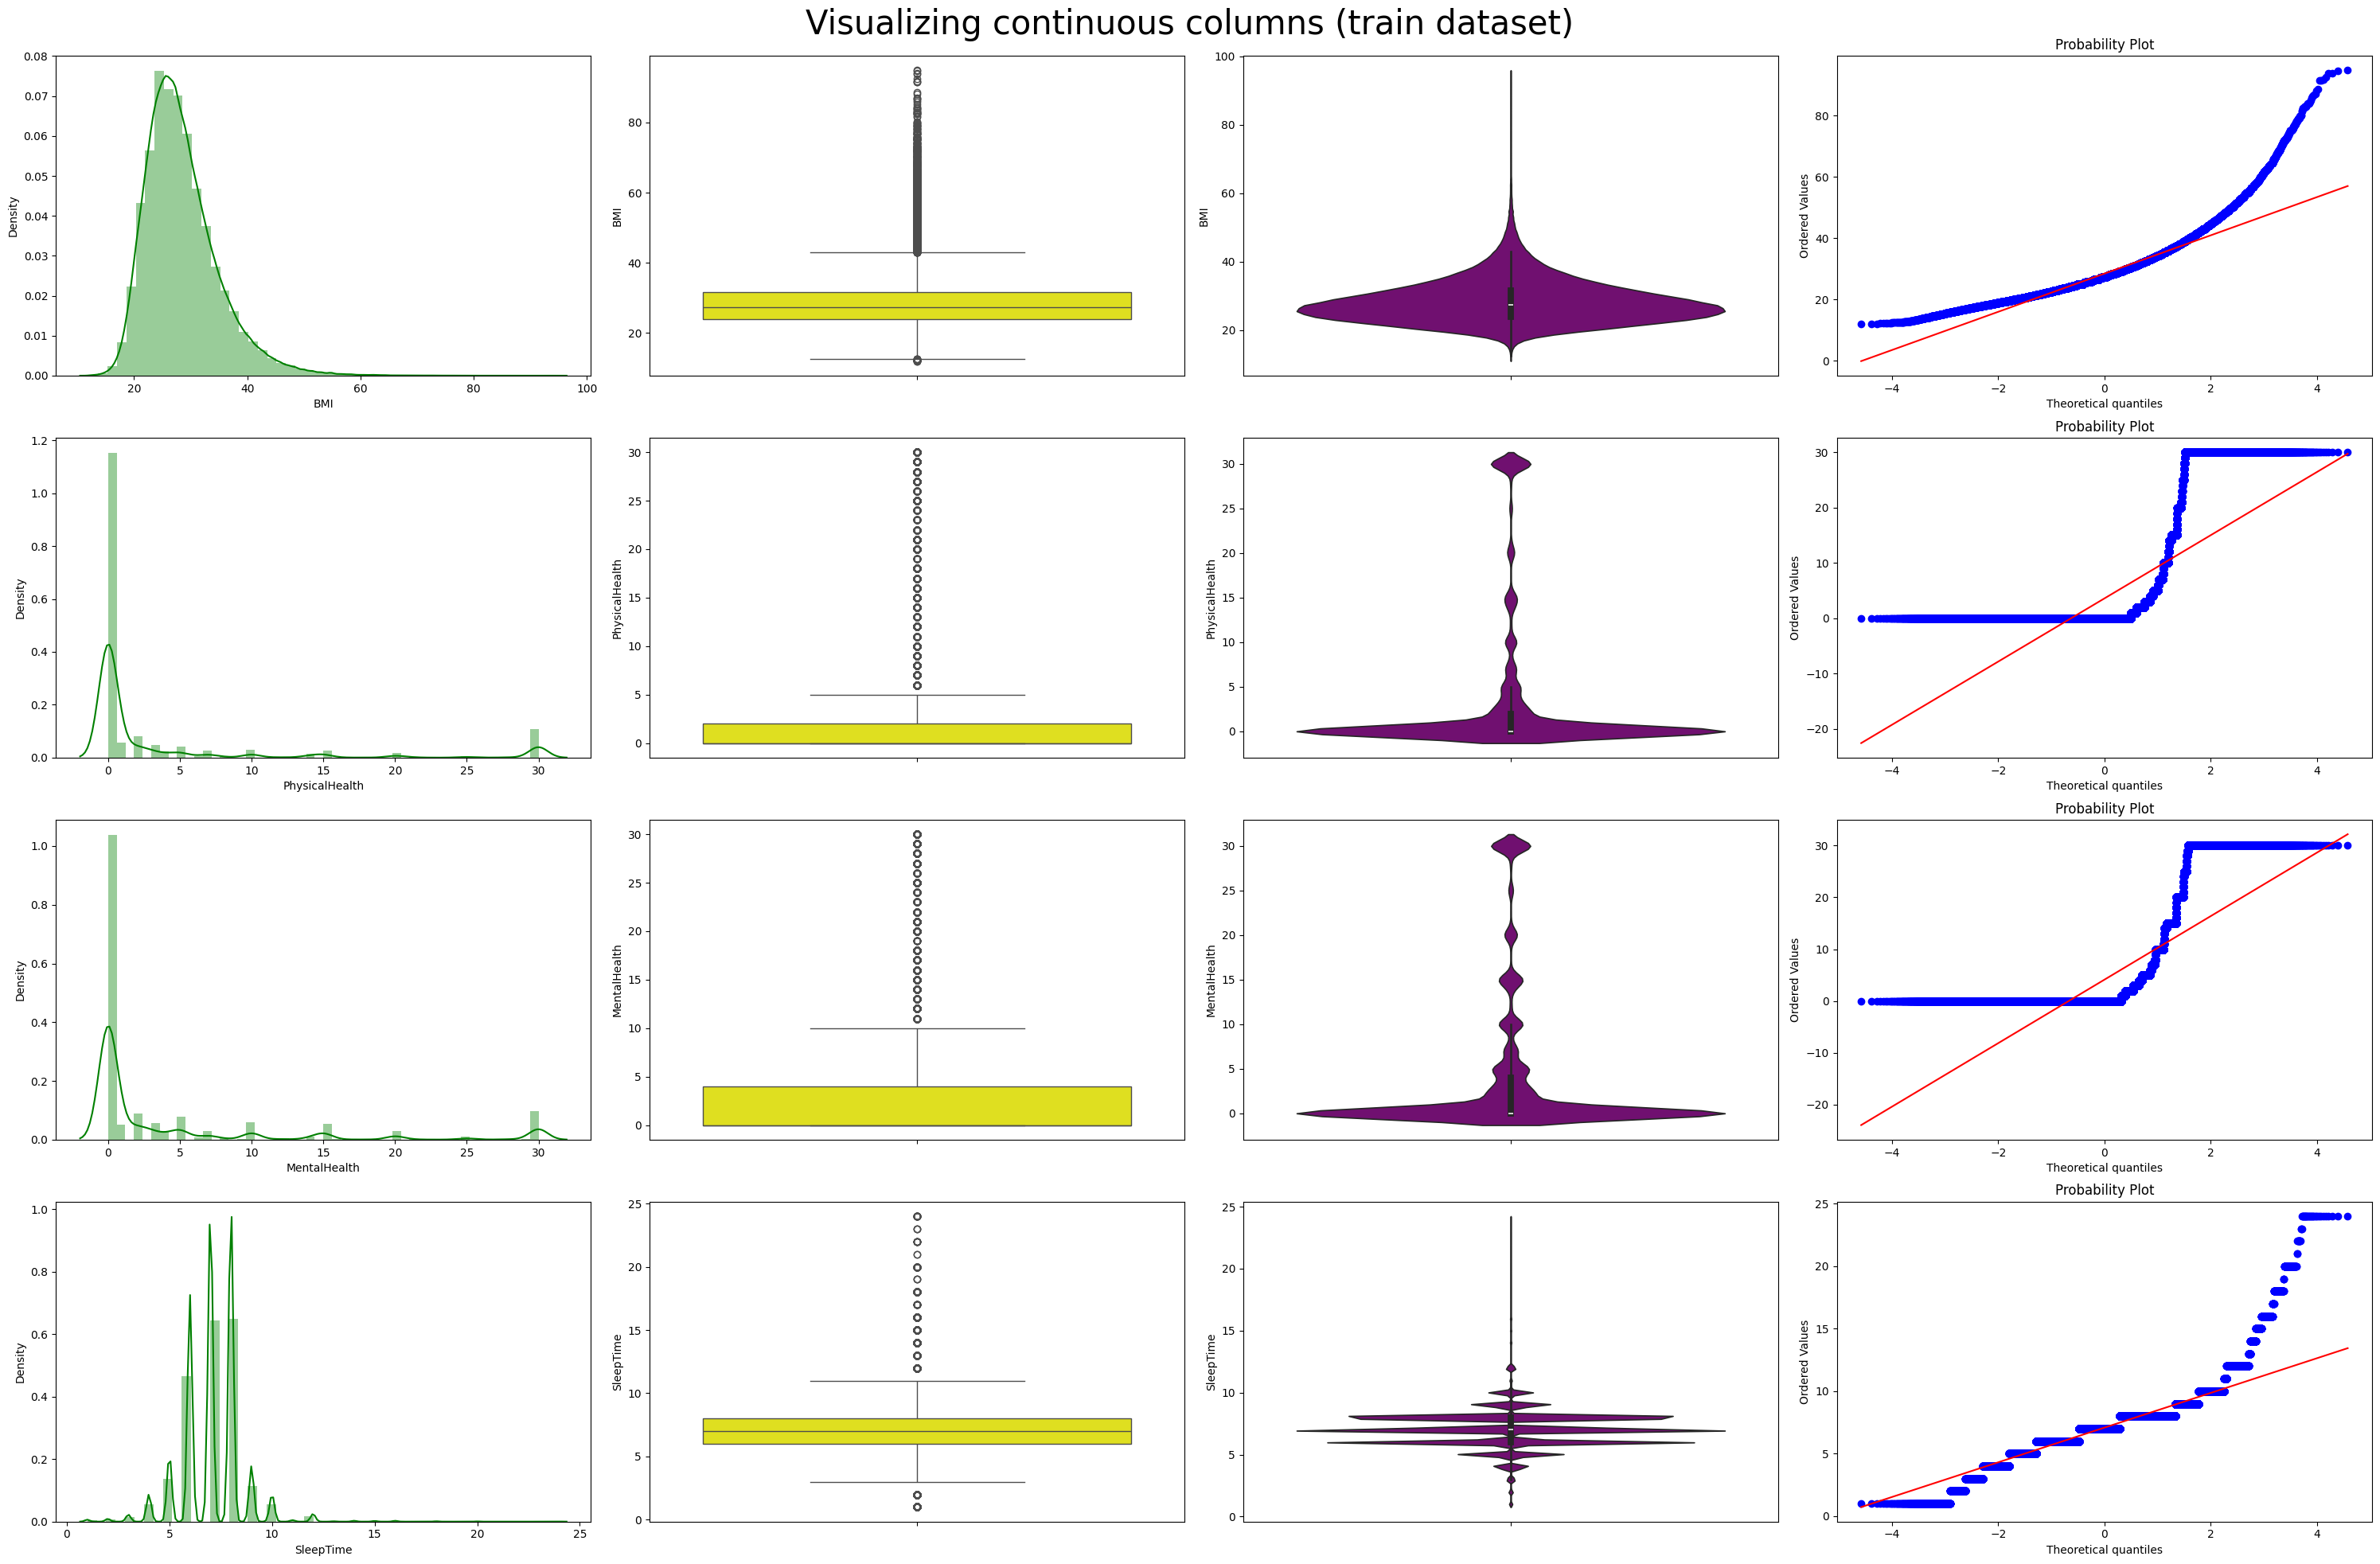

In [72]:
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(df[i],ax=ax[index,0],color='green')
    sns.boxplot(df[i],ax=ax[index,1],color='yellow')
    sns.violinplot(df[i],ax=ax[index,2],color='purple')
    stats.probplot(df[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

Text(0.5, 1.0, 'outlier dari data penyakit jantung')

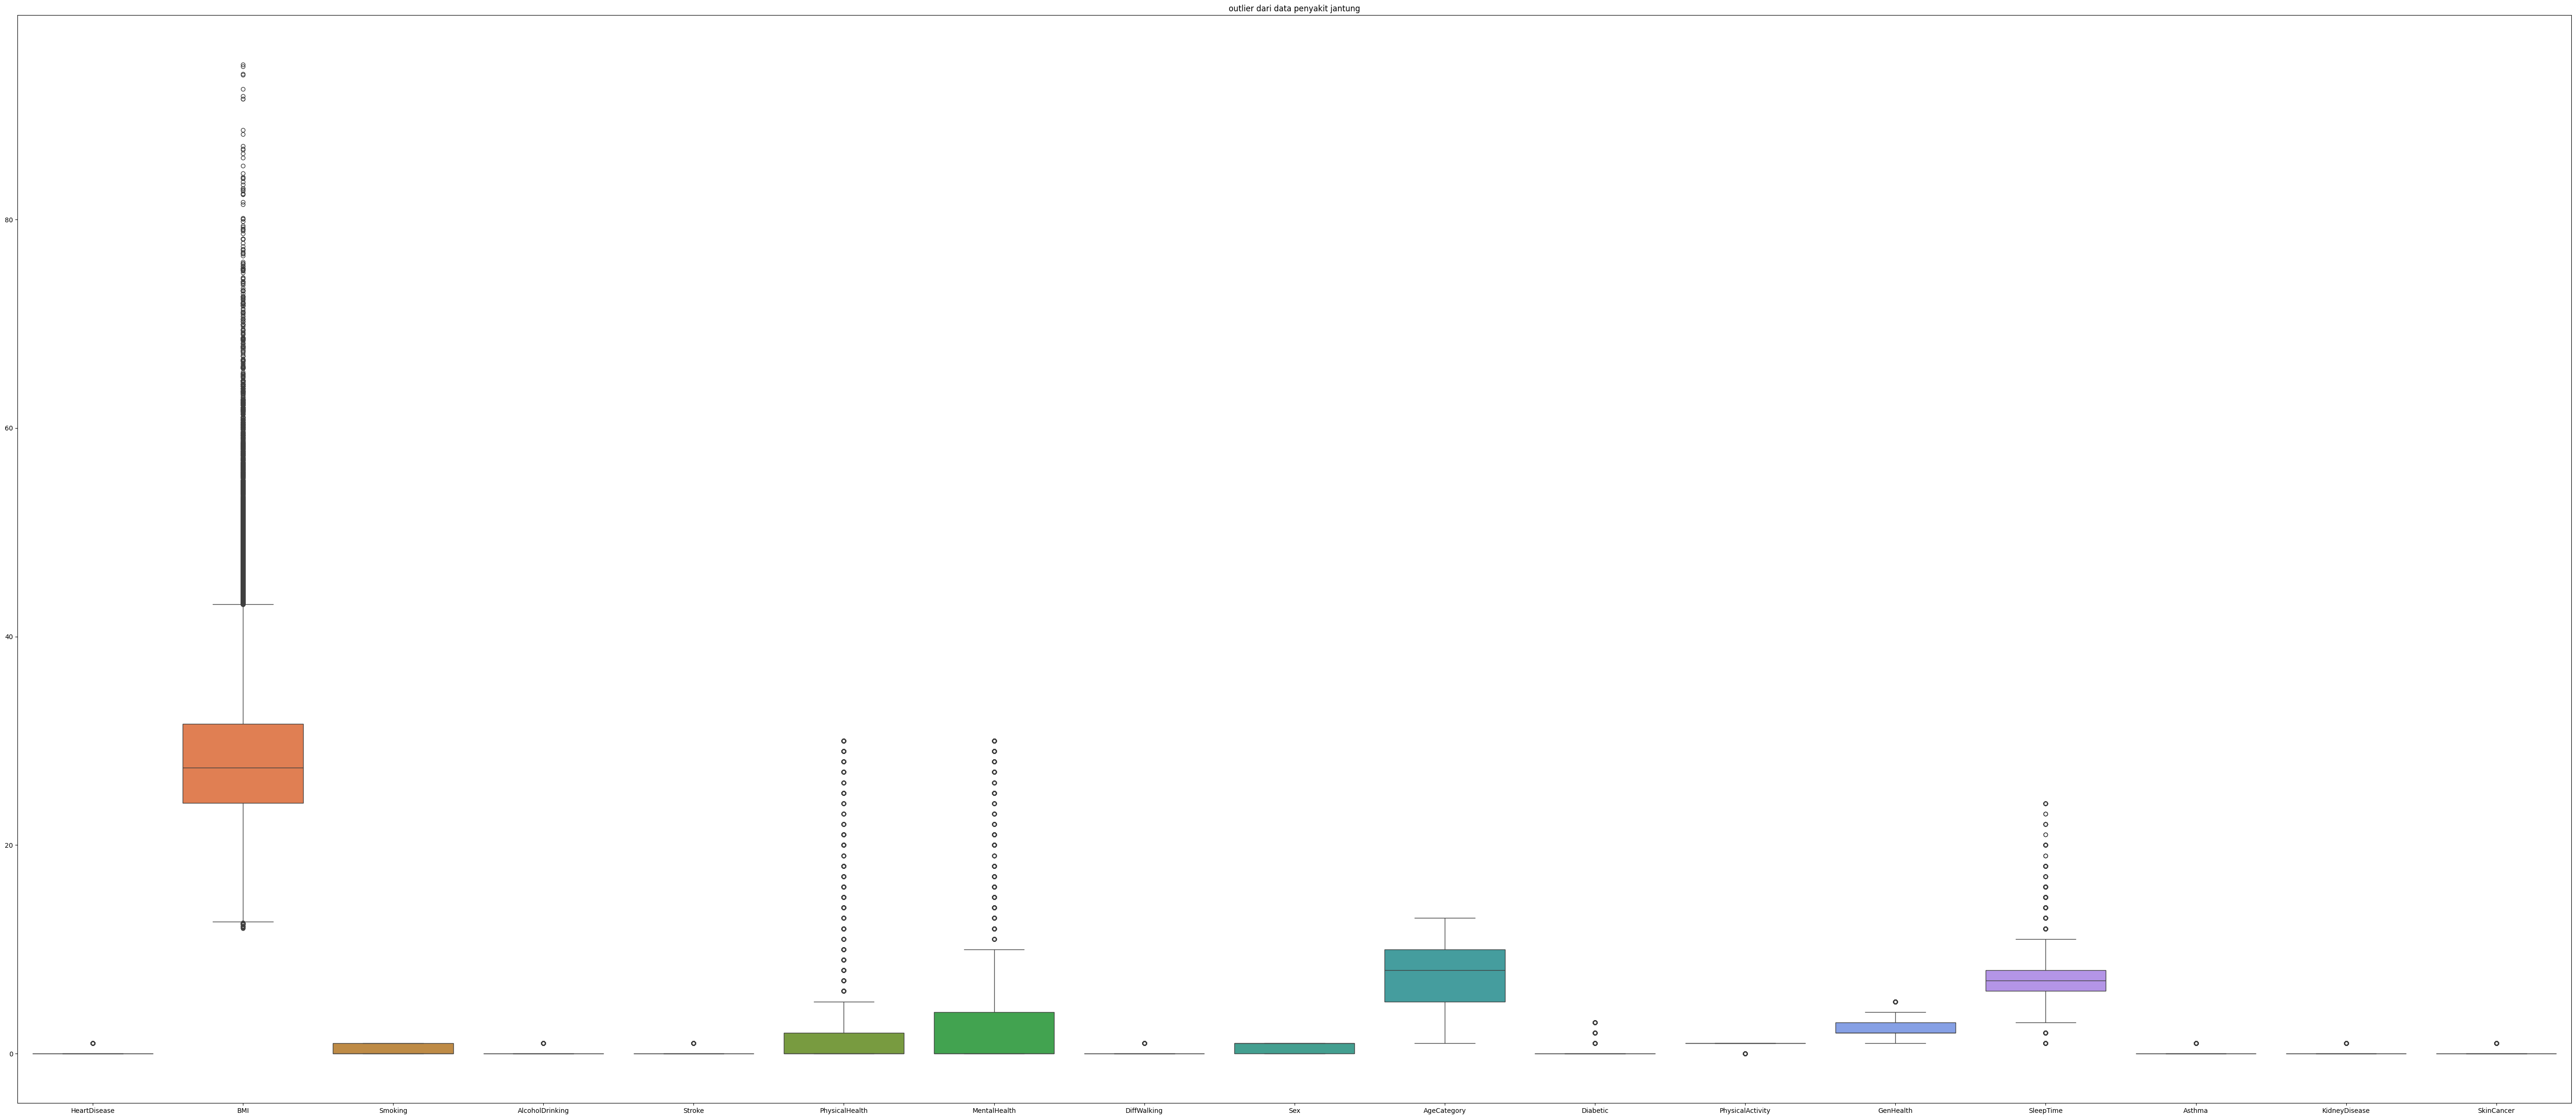

In [73]:
plt.figure(figsize=(70,30))
sns.boxplot(df)
plt.title("outlier dari data penyakit jantung")

Terlihat terdapat data outlier pada variabel BMI, namun karena data BMI ini penting jadi tidak akan di hapus data outlier ini

## METODE SMOTE

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,1,8,1,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,1,13,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,0,10,1,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,1,12,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,1,5,0,1,2,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7,0,1,0,9,1,0,4,6,1,0,0
319791,0,29.84,1,0,0,0,0,0,0,4,0,1,2,5,1,0,0
319792,0,24.24,0,0,0,0,0,0,1,6,0,1,3,6,0,0,0
319793,0,32.81,0,0,0,0,0,0,1,2,0,0,3,12,0,0,0


In [76]:
x = df.drop(['HeartDisease'],axis=1) # x nya adalah atribut yang mempengaruhi penyakit jantung
y = df['HeartDisease'] # y nya adalah label itu sendiri

In [77]:
# sebelum smote
print(x.shape)
print(y.shape)

(301717, 16)
(301717,)


In [78]:
sm = SMOTE(random_state=30)

#melakukan sampling smote
x_sampling, y_sampling = sm.fit_resample(x,y)

In [79]:
# jumlah data setelah dilakukan smote
print(x_sampling.shape)
print(y_sampling.shape)

(548912, 16)
(548912,)


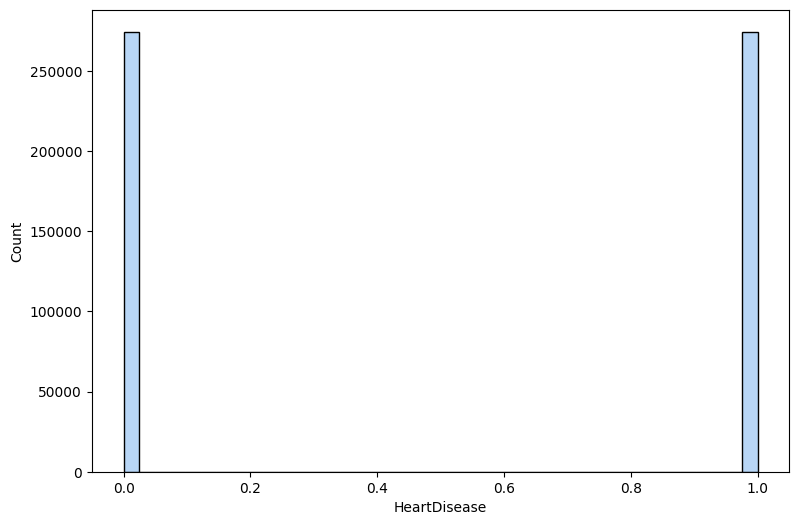

In [80]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

##Metode berhasil diterapkan, saat ini data penderita penyakit jantung sudah sama dengan yang tidak menderita penyakit jantung

## split data


In [81]:
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

print("X : ", X.shape)
print("y : ", y.shape)


X :  (301717, 16)
y :  (301717,)


In [82]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pembagian dengan 20% data test

## Modelling SVM (support vector machine)

In [84]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     54894
           1       0.00      0.00      0.00      5450

    accuracy                           0.91     60344
   macro avg       0.45      0.50      0.48     60344
weighted avg       0.83      0.91      0.87     60344

Akurasi SVM : 90.97%


## Testing

In [85]:
new_data = {
    'BMI'	: [16.6],
    'Smoking'	: [1],
    'AlcoholDrinking' : [0],
    'Stroke'	: [0],
    'PhysicalHealth' : [3],
    'MentalHealth'	: [30],
    'DiffWalking'	: [0],
    'Sex'	: [1],
    'AgeCategory' : [8],
    'Diabetic' : [1],
    'PhysicalActivity' : [1],
    'GenHealth'	: [2],
    'SleepTime'	: [5],
    'Asthma'	: [1],
    'KidneyDisease'	: [0],
    'SkinCancer' : [1]
}

new_data = pd.DataFrame(new_data)
new_data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.6,1,0,0,3,30,0,1,8,1,1,2,5,1,0,1


In [86]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = clf.predict(scaled_new_data)

print("Diagnosis Data Baru : ", y_pred_new)

Diagnosis Data Baru :  [0]


In [90]:
import pickle

In [48]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [93]:
pickle.dump(y_pred_new, open('heartdisease.pkl', 'wb'))

In [94]:
pip install streamlit

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB 660.6 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.1 MB 653.6 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.1 MB 653.6 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.1 MB 653.6 kB/s eta 0:00:13
   ---------------------------------------- 0.0/8.1 MB 653.6 kB/s eta 0:00:13
   ---------------------------------------- 0.1/8.1 MB 245.8 kB/s eta 0:00:33
   ---------------------------------------- 0.1/8.1 MB 245.8 kB/s eta 0:00:33
   ---------------------------------------- 0.1/8.1 MB 245.8 kB/s eta 0:00:33
    --------------------------------------- 0.2/8.1 MB 403.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/8.1 MB 406.9 kB/s eta 0:00:20
   - -------------------------------------- 0.2/8.1 MB 402.0 kB/s eta 0:00:20
   - -------------------------------------- 0.2/8.1 MB 402.0 kB/s eta 0:0